In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Exploratory data analysis

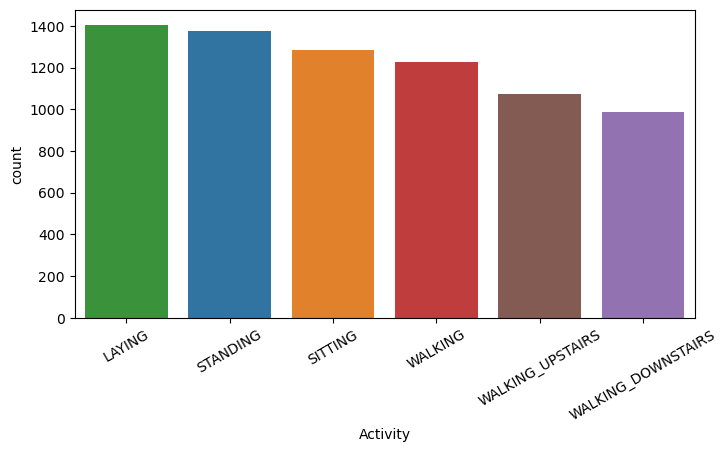

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(x = train.Activity, hue = train.Activity, order = train.Activity.value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [8]:
from collections import Counter
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient = 'index').rename(columns={0:'Count'}).sort_values('Count', ascending=False)

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


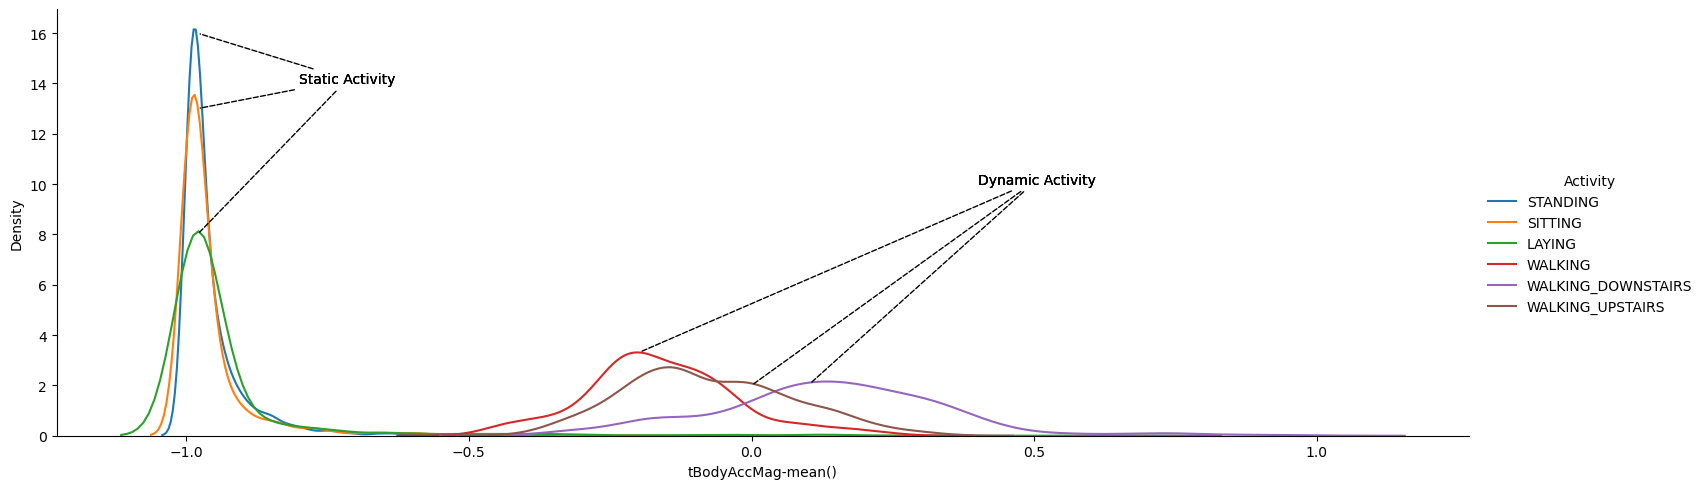

In [12]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()

plt.annotate('Static Activity',xy=(-.98,8), xytext=(-.8,14),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activity',xy=(-.98,13), xytext=(-.8,14),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activity',xy=(-.98,16), xytext=(-0.8,14),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activity',xy=(-.2,3.3), xytext=(.4,10),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activity',xy=(0,2), xytext=(.4,10),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activity',xy=(.1,2), xytext=(.4,10),arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.show()

### TSNE

In [13]:
#for dimensionality reduction
from sklearn.manifold import TSNE

x_for_tsne = train.drop(['subject','Activity'], axis=1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [14]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

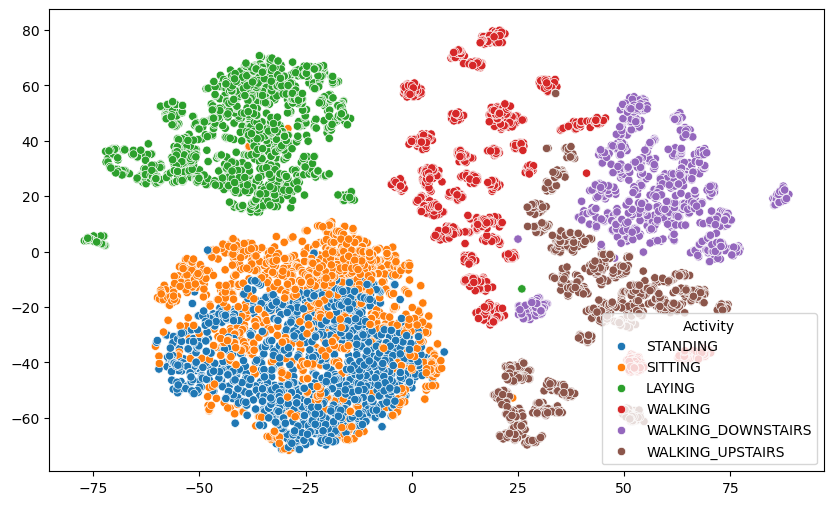

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=train['Activity'])
plt.show()

### Data preparation for ML models

In [16]:
xtrain = train.drop(['subject', 'Activity'],axis=1)
xtest = test.drop(['subject', 'Activity'],axis=1)
ytrain = train.Activity
ytest = test.Activity

### Suppot Vector Machine

In [18]:
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV #for cross validation

parameters = {'kernel':['linear','sigmoid','rbf','poly'],
             'C': [100,50]}
svm = SVC()
svm_rs = RandomizedSearchCV(svm, param_distributions=parameters, cv=3, random_state=42)
svm_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'sigmoid', 'rbf',
                                                   'poly']},
                   random_state=42)

In [19]:
pred_svm = svm_rs.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score
acc_svm = accuracy_score(ytest, pred_svm)
print('Accuracy of the model is',round(acc_svm*100,1),'%')

Accuracy of the model is 96.6 %


In [28]:
from sklearn.metrics import confusion_matrix

def plot_cm(cm, labels): #cm = confusion matrix
    fig,ax=plt.subplots(figsize=(8,6))
    im=ax.imshow(cm,interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           ylabel='True label',
           xlabel='Predicted label')
    plt.xticks(rotation=90)
    thresh=cm.max()/2
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j,i,int(cm[i,j]),
                   ha='center',va='center',color='white'
                   if cm[i,j]>thresh else 'Black')
    fig.tight_layout()

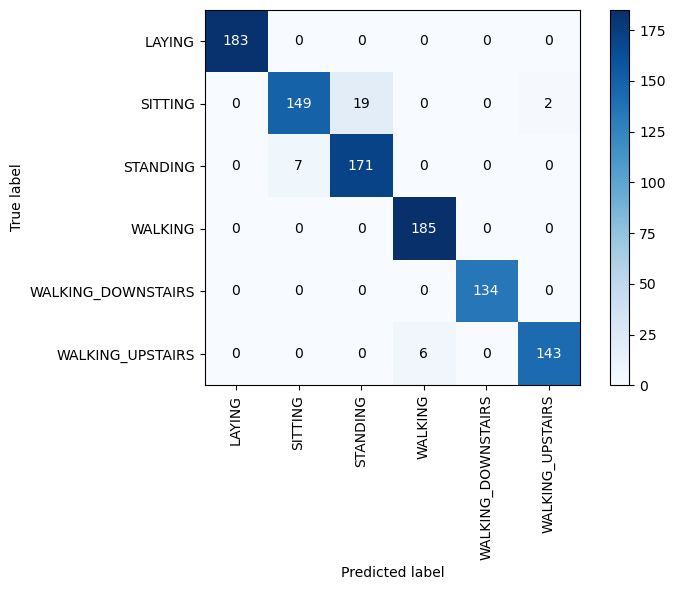

In [29]:
plot_cm(confusion_matrix(ytest, pred_svm), np.unique(pred_svm))

#### Rechecking the prediction

In [40]:
print(ytest.loc[[300]])
print(ytest.loc[[267]])

300    WALKING_UPSTAIRS
Name: Activity, dtype: object
267    WALKING_DOWNSTAIRS
Name: Activity, dtype: object


In [42]:
print(pred_svm[300])
print(pred_svm[267])

['WALKING_UPSTAIRS']
['WALKING_DOWNSTAIRS']
